<a href="https://colab.research.google.com/github/anurag161/Customer_Support_Classification/blob/main/Final_Major_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
%matplotlib inline

In [ ]:
train = pd.read_csv(r"train_users_2.csv")
train

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [ ]:
test = pd.read_csv(r"test_users.csv")
test

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
62092,zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
62093,fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox
62094,87k0fy4ugm,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari


In [ ]:
train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [ ]:
data = pd.concat((train, test), axis = 0, ignore_index = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       275547 non-null  object 
 1   date_account_created     275547 non-null  object 
 2   timestamp_first_active   275547 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   275547 non-null  object 
 5   age                      158681 non-null  float64
 6   signup_method            275547 non-null  object 
 7   signup_flow              275547 non-null  int64  
 8   language                 275547 non-null  object 
 9   affiliate_channel        275547 non-null  object 
 10  affiliate_provider       275547 non-null  object 
 11  first_affiliate_tracked  269462 non-null  object 
 12  signup_app               275547 non-null  object 
 13  first_device_type        275547 non-null  object 
 14  firs

In [ ]:
data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
dtype: int64

In [ ]:
session = pd.read_csv(r"D:\airbnb-recruiting-new-user-bookings\sessions.csv\sessions.csv")
session

<Axes: >

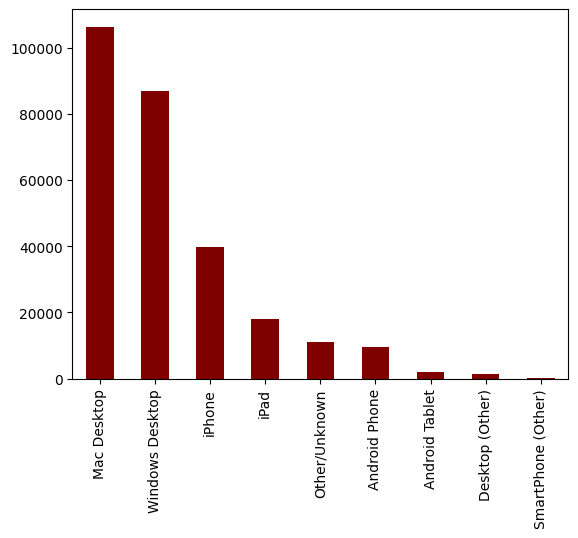

In [ ]:
data['first_device_type'].value_counts()
data['first_device_type'].value_counts(dropna=False).plot(kind='bar',color='maroon')

<Axes: >

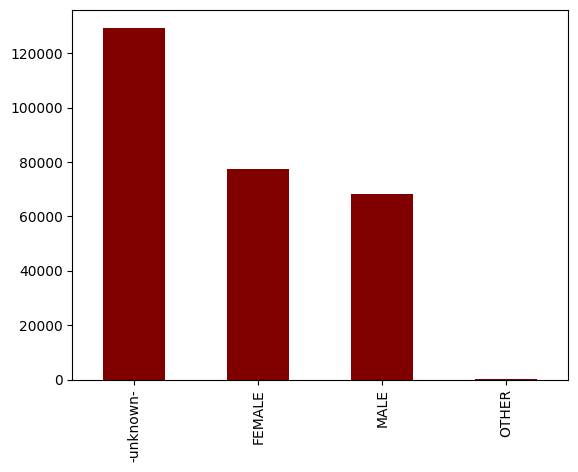

In [ ]:
data['gender'].value_counts(dropna=False).plot(kind='bar',color='maroon')

<Axes: >

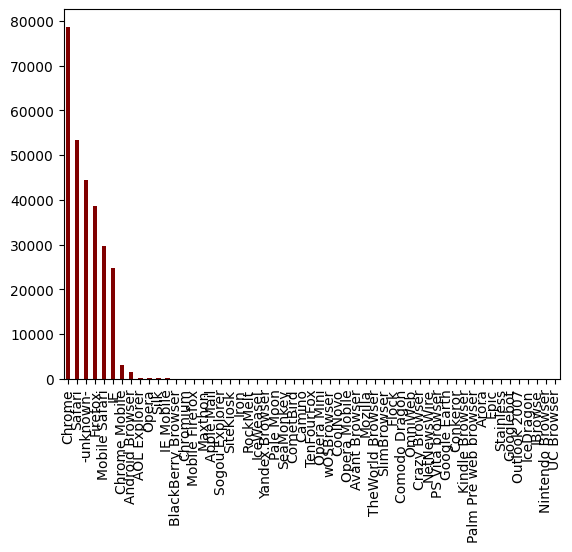

In [ ]:
data['first_browser'].value_counts(dropna=False).plot(kind='bar',color='maroon')

<Axes: >

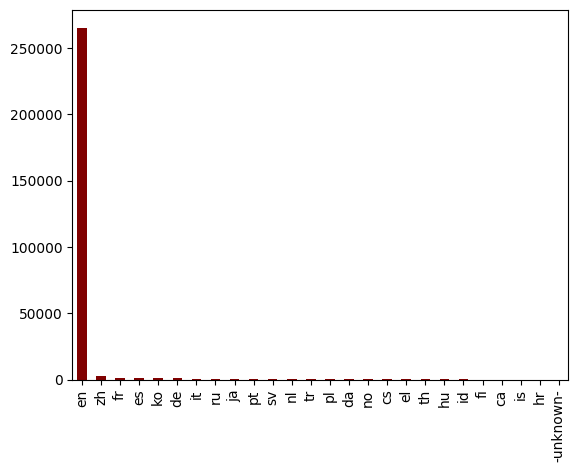

In [ ]:
data['language'].value_counts(dropna=False).plot(kind='bar',color='maroon')

<Axes: >

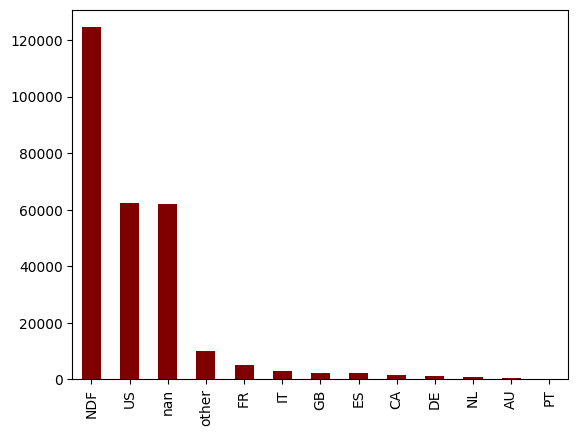

In [ ]:
data['country_destination'].value_counts(dropna=False).plot(kind='bar',color='maroon')

<Axes: >

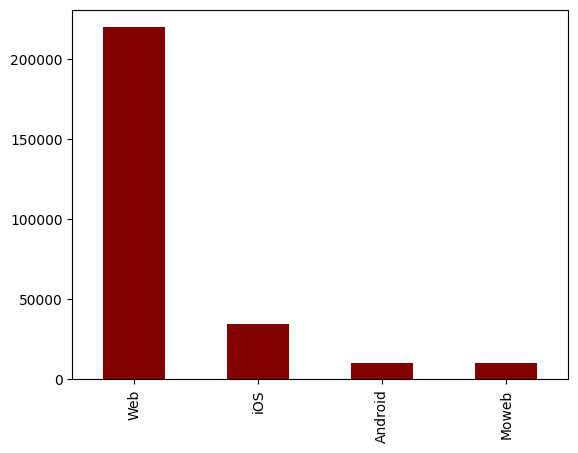

In [ ]:
data['signup_app'].value_counts(dropna=False).plot(kind='bar',color='maroon')

In [ ]:
data.groupby('gender').age.agg(['min','max','mean','count'])

,min,max,mean,count
gender,,,,
-unknown-,1.0,2014.0,44.581328,22237
FEMALE,1.0,2014.0,49.645347,71907
MALE,1.0,2014.0,45.191540,64258
OTHER,17.0,2014.0,57.146953,279


In [ ]:
import numpy as np
data.loc[data.age > 100, 'age'] = np.nan
data.groupby('gender').age.agg(['min','max','mean','count'])

,min,max,mean,count
gender,,,,
-unknown-,1.0,100.0,36.470110,21412
FEMALE,1.0,100.0,35.711567,70838
MALE,1.0,100.0,36.269660,63465
OTHER,17.0,78.0,35.876812,276


2

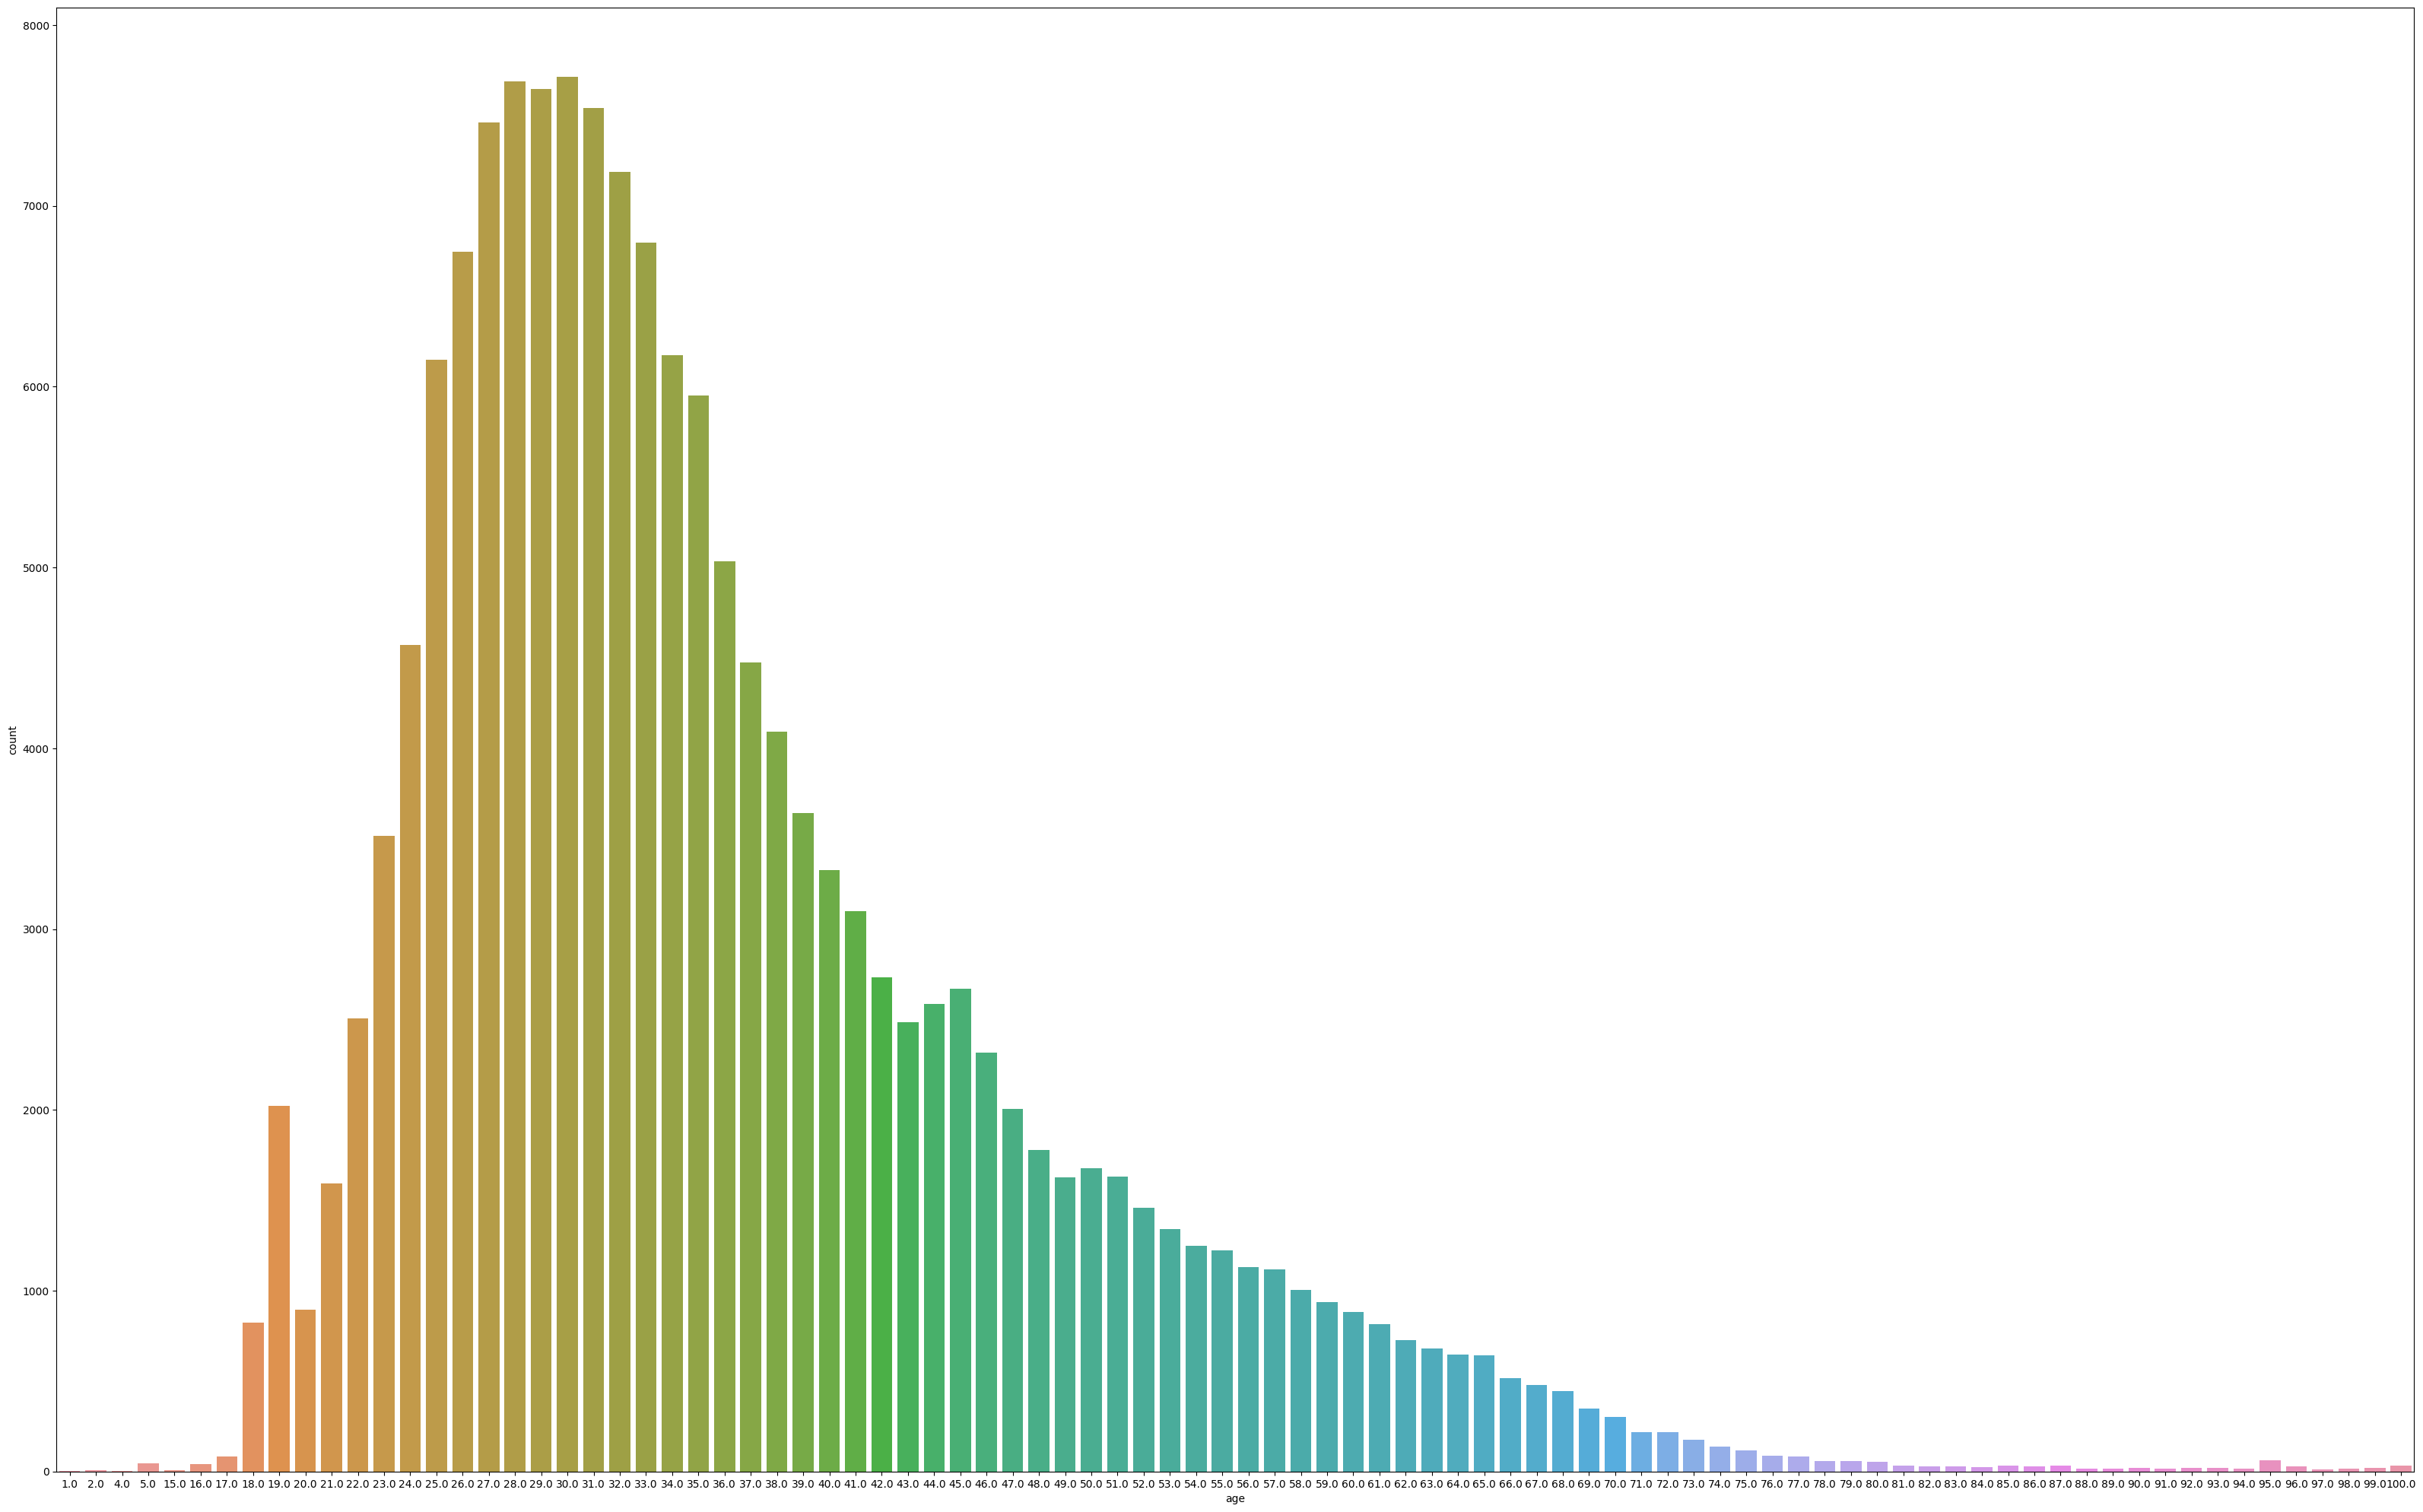

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40,25))
sns.countplot(x='age', data=data)
data["age"] = data["age"].fillna(data.groupby(["signup_method","signup_app","gender"])["age"].transform("mean"))
data["age"].isnull().sum()

In [ ]:
data["date_account_created"] = pd.to_datetime(data["date_account_created"])
data["date_account_created_day"] = data.date_account_created.dt.weekday
data["date_account_created_month"] = data.date_account_created.dt.month
data["date_account_created_year"] = data.date_account_created.dt.year

data['timestamp_first_active'] = pd.to_datetime(data['timestamp_first_active'], format='%Y%m%d%H%M%S')
data["timestamp_first_active_day"] = data.timestamp_first_active.dt.weekday
data["timestamp_first_active_month"] = data.timestamp_first_active.dt.month
data["timestamp_first_active_year"] = data.timestamp_first_active.dt.year
data["timestamp_first_active_hour"] = data.timestamp_first_active.dt.hour

<Axes: xlabel='date_account_created_year', ylabel='count'>

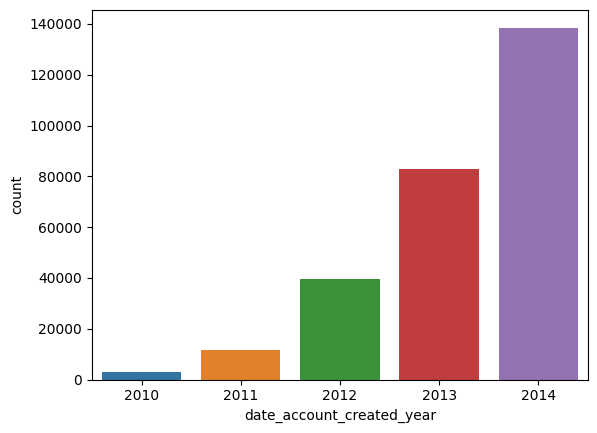

In [ ]:
sns.countplot(x='date_account_created_year', data=data)

<Axes: xlabel='date_account_created_month', ylabel='count'>

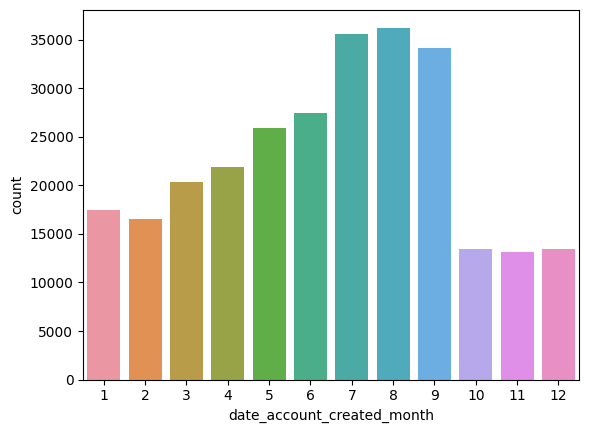

In [ ]:
sns.countplot(x='date_account_created_month', data=data)

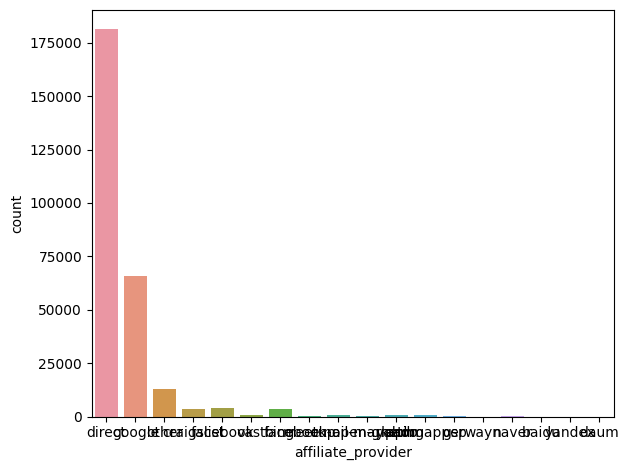

In [ ]:
sns.countplot(x='affiliate_provider', data=data)
plt.tight_layout()

In [ ]:
data["date_account_created_day"] = data["date_account_created_day"].astype("O")
data["date_account_created_month"] = data["date_account_created_month"].astype("O")
data["date_account_created_year"] = data["date_account_created_year"].astype("O")

data["timestamp_first_active_day"] = data["timestamp_first_active_day"].astype("O")
data["timestamp_first_active_month"] = data["timestamp_first_active_month"].astype("O")
data["timestamp_first_active_year"] = data["timestamp_first_active_year"].astype("O")
data["timestamp_first_active_hour"] = data["timestamp_first_active_hour"].astype("O")

data["signup_flow"] = data["signup_flow"].astype("O")

In [ ]:
drop_cols = ["id","date_account_created","timestamp_first_active","date_first_booking"]
data.drop(columns=drop_cols, inplace=True)

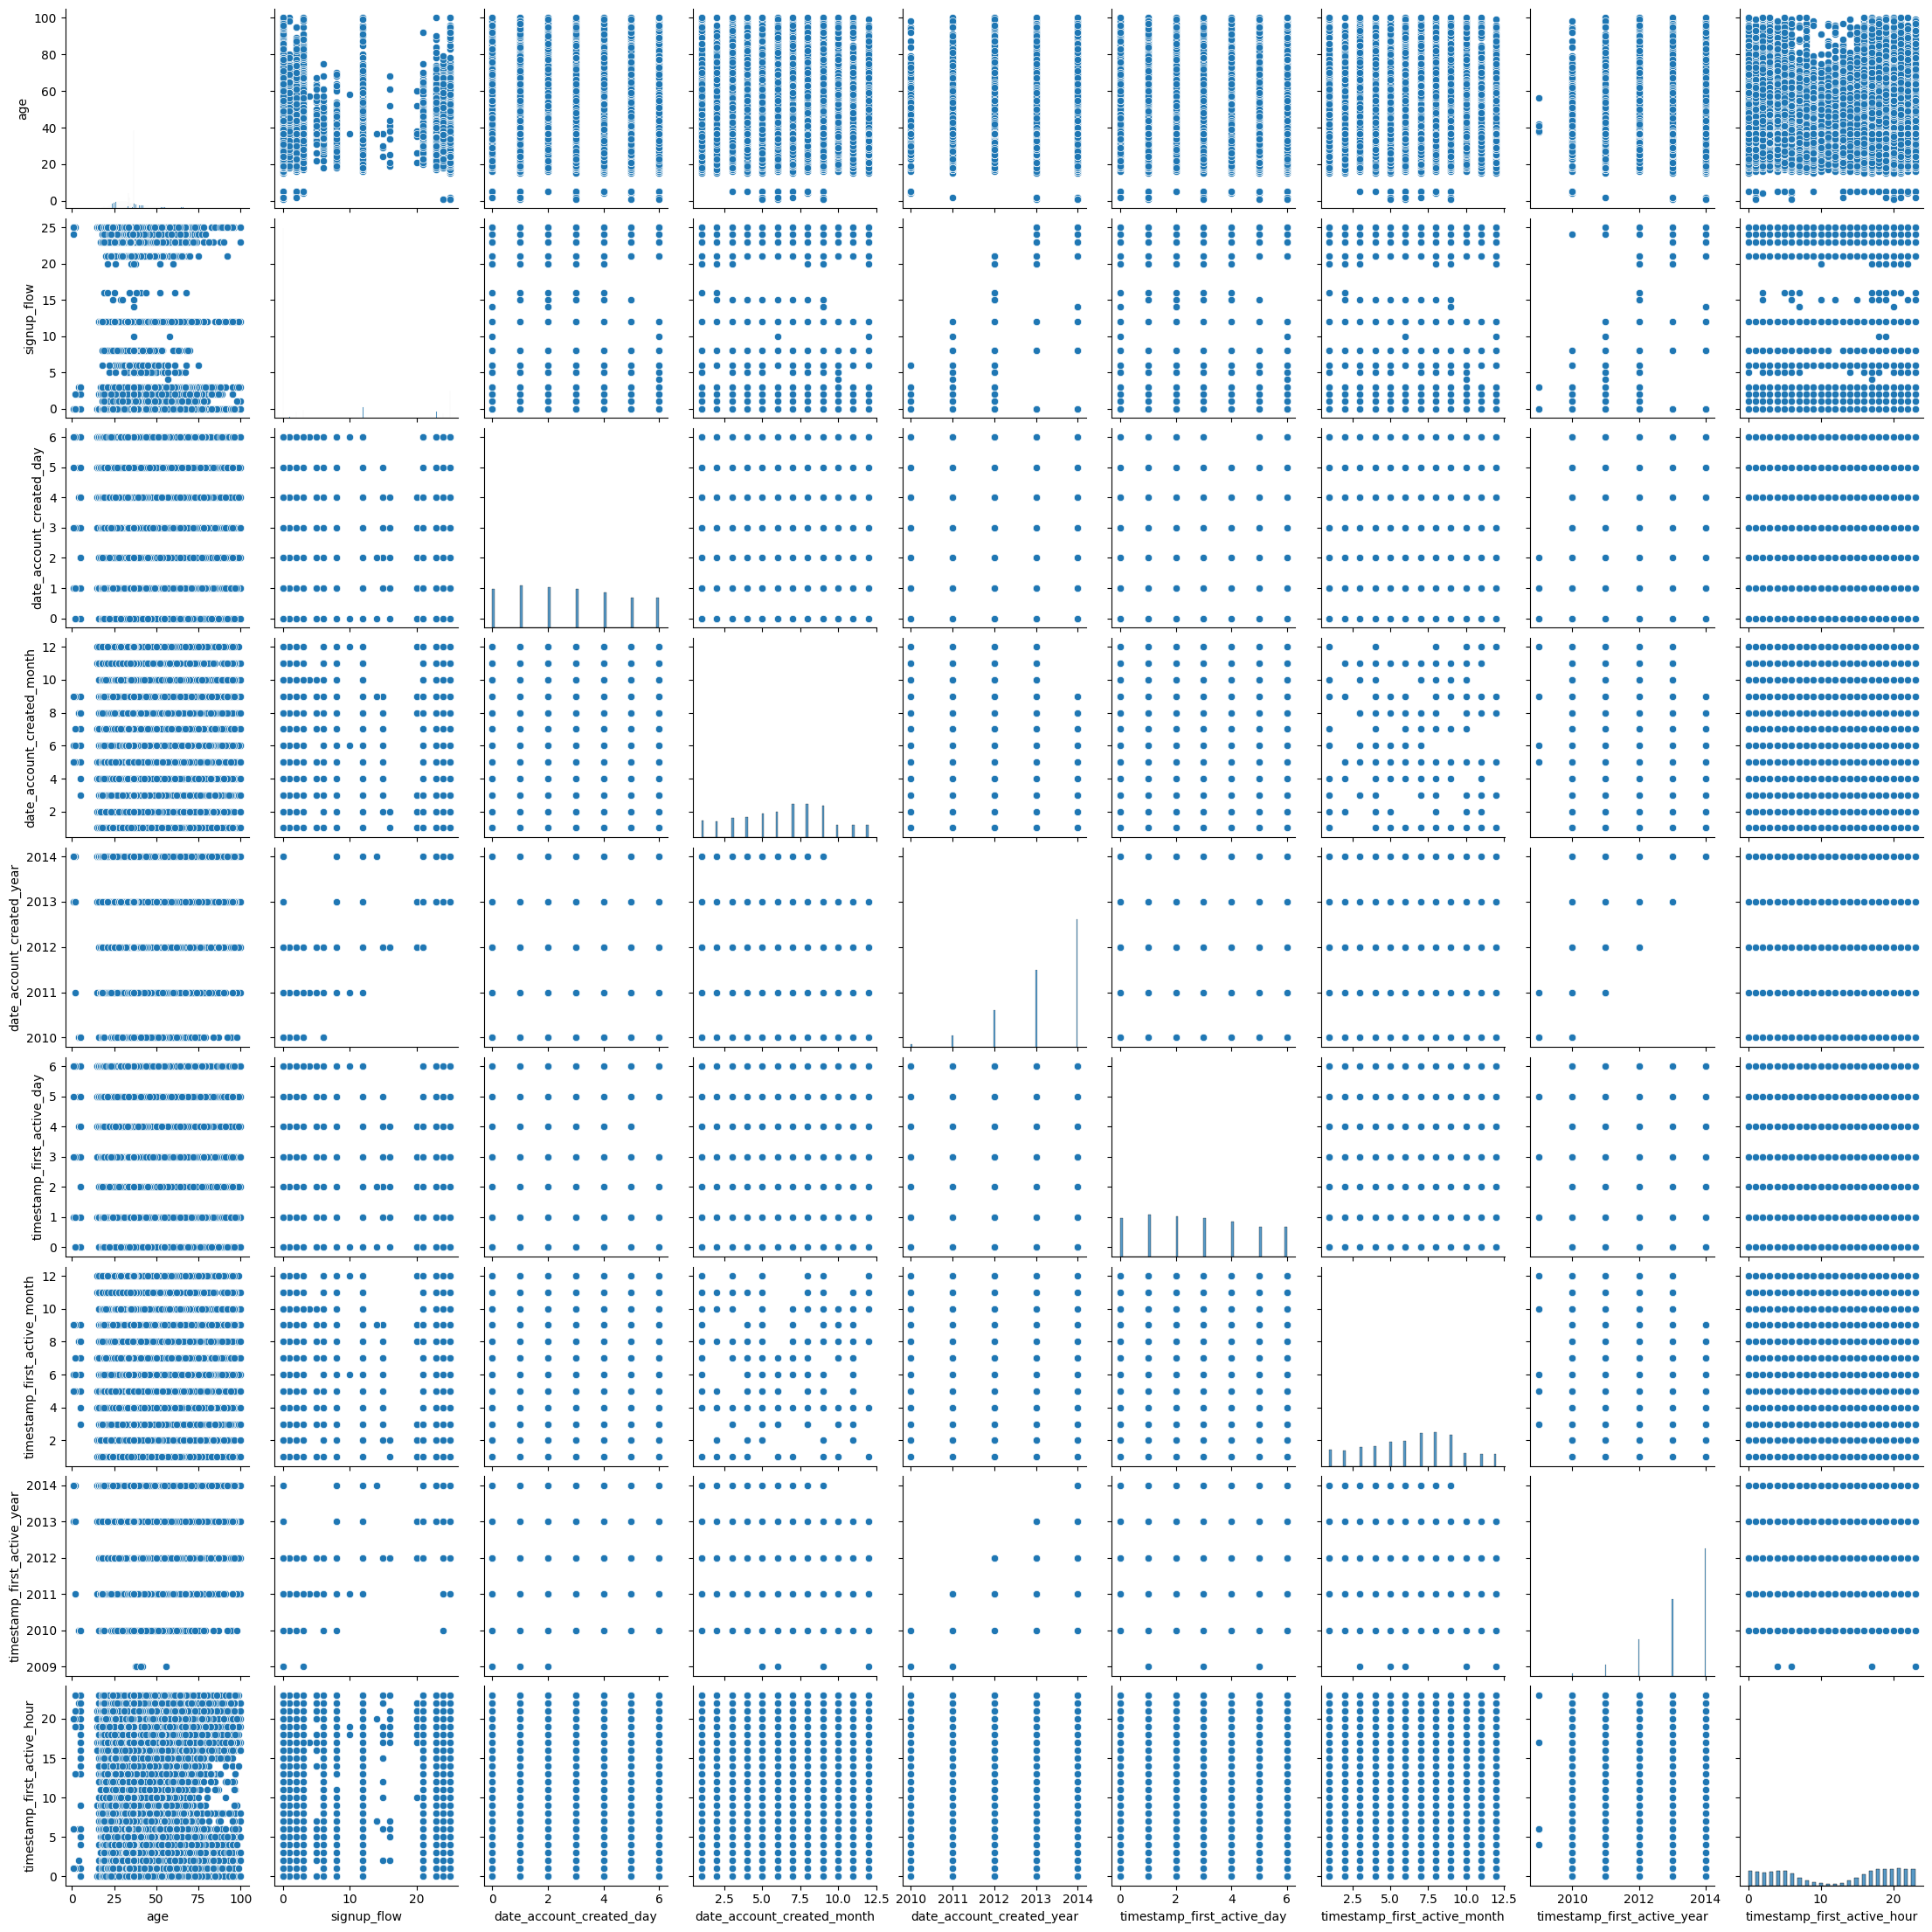

In [ ]:
sns.pairplot(data)

In [ ]:
data

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_account_created_day,date_account_created_month,date_account_created_year,timestamp_first_active_day,timestamp_first_active_month,timestamp_first_active_year,timestamp_first_active_hour
0,-unknown-,37.813757,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,0,6,2010,3,3,2009,4
1,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2,5,2011,5,5,2009,17
2,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,1,9,2010,1,6,2009,23
3,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,0,12,2011,5,10,2009,6
4,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1,9,2010,1,12,2009,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,-unknown-,31.000000,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN,1,9,2014,1,9,2014,23
275543,-unknown-,34.497727,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,NaN,1,9,2014,1,9,2014,23
275544,-unknown-,36.868441,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,NaN,1,9,2014,1,9,2014,23
275545,-unknown-,36.868441,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NaN,1,9,2014,1,9,2014,23


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   gender                        275547 non-null  object 
 1   age                           275545 non-null  float64
 2   signup_method                 275547 non-null  object 
 3   signup_flow                   275547 non-null  object 
 4   language                      275547 non-null  object 
 5   affiliate_channel             275547 non-null  object 
 6   affiliate_provider            275547 non-null  object 
 7   first_affiliate_tracked       269462 non-null  object 
 8   signup_app                    275547 non-null  object 
 9   first_device_type             275547 non-null  object 
 10  first_browser                 275547 non-null  object 
 11  country_destination           213451 non-null  object 
 12  date_account_created_day      275547 non-nul

In [ ]:
isnull = data["first_affiliate_tracked"].isnull()
sample = data["first_affiliate_tracked"].dropna().sample(isnull.sum(), replace=True).values
data.loc[isnull, 'first_affiliate_tracked'] = sample

data["first_affiliate_tracked"].isnull().sum()

0

In [ ]:
data.isnull().sum()

gender                              0
age                                 2
signup_method                       0
signup_flow                         0
language                            0
affiliate_channel                   0
affiliate_provider                  0
first_affiliate_tracked             0
signup_app                          0
first_device_type                   0
first_browser                       0
country_destination             62096
date_account_created_day            0
date_account_created_month          0
date_account_created_year           0
timestamp_first_active_day          0
timestamp_first_active_month        0
timestamp_first_active_year         0
timestamp_first_active_hour         0
dtype: int64

In [ ]:
def rare_analyser(dataframe, cat_cols):
    total_value_counts=0
    for col in cat_cols:
        total_value_counts += len(dataframe[col].value_counts())
    print("total value counts:", total_value_counts)

    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe)}), end="\n\n\n")

cat_cols = [col for col in data.columns if data[col].dtypes == 'O']
rare_analyser(data, cat_cols)

total value counts: 238
gender : 4
            COUNT     RATIO
-unknown-  129480  0.469902
FEMALE      77524  0.281346
MALE        68209  0.247540
OTHER         334  0.001212


signup_method : 4
           COUNT     RATIO
basic     198222  0.719376
facebook   74864  0.271692
google      2438  0.008848
weibo         23  0.000083


signup_flow : 18
     COUNT     RATIO
0   206092  0.747938
25   29834  0.108272
12   11244  0.040806
3     8822  0.032016
2     6881  0.024972
23    6408  0.023256
24    4328  0.015707
1     1047  0.003800
8      315  0.001143
6      301  0.001092
21     197  0.000715
5       36  0.000131
20      14  0.000051
16      11  0.000040
15      10  0.000036
14       4  0.000015
10       2  0.000007
4        1  0.000004


language : 26
            COUNT     RATIO
en         265538  0.963676
zh           2634  0.009559
fr           1508  0.005473
es           1174  0.004261
ko           1116  0.004050
de            977  0.003546
it            633  0.002297
ru          

In [ ]:




df=data

In [ ]:
df2 = df.copy()

rare_columns = [col for col in df2.columns if df2[col].dtypes == 'O'
                    and (df2[col].value_counts() / len(df2) < 0.005).any(axis=None)]
rare_columns = [i for i in rare_columns if i not in ("country_destination")] #because this is the target variable

for var in rare_columns:
        tmp = df2[var].value_counts() / len(df2)
        rare_labels = tmp[tmp < 0.005].index
        df2[var] = np.where(df2[var].isin(rare_labels), 'Rare', df2[var])
cat_cols = [col for col in df2.columns if df2[col].dtype =="O"]
cat_cols.remove("country_destination")
df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)
df2.info()

<ipython-input-34-b78dd2bb20e8>:13: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)
<ipython-input-34-b78dd2bb20e8>:13: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)
<ipython-input-34-b78dd2bb20e8>:13: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)
<ipython-input-34-b78dd2bb20e8>:13: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)
<ipy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Columns: 121 entries, age to timestamp_first_active_hour_23
dtypes: float64(1), object(1), uint8(119)
memory usage: 35.5+ MB


<ipython-input-34-b78dd2bb20e8>:13: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   gender                        275547 non-null  object 
 1   age                           275545 non-null  float64
 2   signup_method                 275547 non-null  object 
 3   signup_flow                   275547 non-null  object 
 4   language                      275547 non-null  object 
 5   affiliate_channel             275547 non-null  object 
 6   affiliate_provider            275547 non-null  object 
 7   first_affiliate_tracked       275547 non-null  object 
 8   signup_app                    275547 non-null  object 
 9   first_device_type             275547 non-null  object 
 10  first_browser                 275547 non-null  object 
 11  country_destination           213451 non-null  object 
 12  date_account_created_day      275547 non-nul

In [ ]:
data

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_account_created_day,date_account_created_month,date_account_created_year,timestamp_first_active_day,timestamp_first_active_month,timestamp_first_active_year,timestamp_first_active_hour
0,-unknown-,37.813757,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,0,6,2010,3,3,2009,4
1,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2,5,2011,5,5,2009,17
2,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,1,9,2010,1,6,2009,23
3,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,0,12,2011,5,10,2009,6
4,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1,9,2010,1,12,2009,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,-unknown-,31.000000,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN,1,9,2014,1,9,2014,23
275543,-unknown-,34.497727,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,NaN,1,9,2014,1,9,2014,23
275544,-unknown-,36.868441,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,NaN,1,9,2014,1,9,2014,23
275545,-unknown-,36.868441,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NaN,1,9,2014,1,9,2014,23


In [ ]:

# from sklearn.preprocessing import LabelEncoder
# labler = LabelEncoder()
# y = labler.fit_transform(data['country_destination'].values)


In [ ]:
# dff = pd.DataFrame(y,columns=['cd1'])
# print(dff)

In [ ]:
data

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelBinarizer
def dcg_score(y_true, y_score, k=5):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):
    lb = LabelBinarizer()
    lb.fit(range(predictions.shape[1] + 1))
    T = lb.transform(ground_truth)

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)

# NDCG Scorer function
ndcg_scorer = make_scorer(ndcg_score, needs_proba=True, k=5)

In [ ]:
print(ndcg_scorer)

make_scorer(ndcg_score, needs_proba=True, k=5)


In [ ]:
df2 = df2.fillna(df2.mean())

<ipython-input-41-e6b40796e1c8>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = df2.fillna(df2.mean())


In [ ]:
df2.isnull().sum()

age                                   0
country_destination               62096
gender_FEMALE                         0
gender_MALE                           0
gender_Rare                           0
                                  ...  
timestamp_first_active_hour_19        0
timestamp_first_active_hour_20        0
timestamp_first_active_hour_21        0
timestamp_first_active_hour_22        0
timestamp_first_active_hour_23        0
Length: 121, dtype: int64

In [ ]:
train_df_rows_no = train.shape[0]
data_train=df2[:train_df_rows_no]
data_train

,age,country_destination,gender_FEMALE,gender_MALE,gender_Rare,signup_method_basic,signup_method_facebook,signup_method_google,signup_flow_2,signup_flow_3,...,timestamp_first_active_hour_14,timestamp_first_active_hour_15,timestamp_first_active_hour_16,timestamp_first_active_hour_17,timestamp_first_active_hour_18,timestamp_first_active_hour_19,timestamp_first_active_hour_20,timestamp_first_active_hour_21,timestamp_first_active_hour_22,timestamp_first_active_hour_23
0,37.813757,NDF,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.000000,NDF,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,56.000000,US,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,42.000000,other,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.000000,US,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,32.000000,NDF,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
213447,36.868441,NDF,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
213448,32.000000,NDF,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
213449,33.647458,NDF,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_test=df2[train_df_rows_no:]
data_test.drop(columns=["country_destination"],inplace=True)

<ipython-input-44-1098fcb6bdb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop(columns=["country_destination"],inplace=True)


In [ ]:
data_test

,age,gender_FEMALE,gender_MALE,gender_Rare,signup_method_basic,signup_method_facebook,signup_method_google,signup_flow_2,signup_flow_3,signup_flow_12,...,timestamp_first_active_hour_14,timestamp_first_active_hour_15,timestamp_first_active_hour_16,timestamp_first_active_hour_17,timestamp_first_active_hour_18,timestamp_first_active_hour_19,timestamp_first_active_hour_20,timestamp_first_active_hour_21,timestamp_first_active_hour_22,timestamp_first_active_hour_23
213451,35.000000,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213452,33.991803,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213453,36.868441,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213454,36.868441,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213455,36.868441,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,31.000000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
275543,34.497727,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
275544,36.868441,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
275545,36.868441,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_train['country_destination']

0           NDF
1           NDF
2            US
3         other
4            US
          ...  
213446      NDF
213447      NDF
213448      NDF
213449      NDF
213450      NDF
Name: country_destination, Length: 213451, dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
y = data_train['country_destination']
x = data_train.drop(columns='country_destination')
le = LabelEncoder()
y = le.fit_transform(y)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size =0.25, random_state=123)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_val, y_pred))

ACCURACY OF THE MODEL:  0.592751531960347


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_val,y_val)

y_pred=clf.predict(x_val)
accuracy = metrics.accuracy_score(y_val, y_pred)
print("accuracy of x_test")
print("Accuracy:", accuracy)

accuracy of x_test
Accuracy: 0.6090924423289545


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
alpha = [15, 20,30,40]
for i in alpha:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    prob_knn = knn.predict_proba(x_val)
    score_knn = ndcg_score(y_val, prob_knn, k=5)
    y_pred=d_tree.predict(x_val)
    print(metrics.accuracy_score(y_val, y_pred))
    print("For alpha : {}".format(i))
    print("NDCG score : {}".format(score_knn))

0.6251897382081217
For alpha : 15
NDCG score : 0.7990687611159034
0.6251897382081217
For alpha : 20
NDCG score : 0.8024037453798589
0.6251897382081217
For alpha : 30
NDCG score : 0.8065496943645079
0.6251897382081217
For alpha : 40
NDCG score : 0.8088120717158932


In [ ]:

from sklearn.ensemble import RandomForestClassifier
n_estimator= [10,50,100,500]
max_depth= [1,2,3,4,6]

for i in max_depth:
    for j in (n_estimator):

        clf_rf = RandomForestClassifier(n_estimators=j, criterion='gini', max_depth=i, random_state=42, n_jobs=-1)
        clf_rf.fit(x_train,y_train)
        prob_rf = clf_rf.predict_proba(x_val)
        score_rf = ndcg_score(y_val, prob_rf, k=5)
        y_pred=clf_rf.predict(x_val)
        print ("Depth of tree : {}".format(i))
        print(metrics.accuracy_score(y_val, y_pred))
        print ("Number of Estimators : {}".format(j))
        print ("NDCG Score : {}".format(score_rf))
        print("*****************")

Depth of tree : 1
0.5814140884133201
Number of Estimators : 10
NDCG Score : 0.8052810145027256
*****************
Depth of tree : 1
0.5814140884133201
Number of Estimators : 50
NDCG Score : 0.8052810145027256
*****************
Depth of tree : 1
0.5814140884133201
Number of Estimators : 100
NDCG Score : 0.8052810145027256
*****************
Depth of tree : 1
0.5814140884133201
Number of Estimators : 500
NDCG Score : 0.8052810145027256
*****************
Depth of tree : 2
0.5814140884133201
Number of Estimators : 10
NDCG Score : 0.8052810145027256
*****************
Depth of tree : 2
0.5814140884133201
Number of Estimators : 50
NDCG Score : 0.8052810145027256
*****************
Depth of tree : 2
0.5814140884133201
Number of Estimators : 100
NDCG Score : 0.8052810145027256
*****************
Depth of tree : 2
0.5814140884133201
Number of Estimators : 500
NDCG Score : 0.8052810145027256
*****************
Depth of tree : 3
0.5815640050222064
Number of Estimators : 10
NDCG Score : 0.80532909480488

In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_depth=[7,8,9,10,11,12]
min_samples_split=[50,100]

for i in max_depth:
    for j in min_samples_split:

        d_tree = DecisionTreeClassifier(criterion='gini', max_depth=i , min_samples_split= j )
        d_tree.fit(x_train,y_train)
        prob_dt = d_tree.predict_proba(x_val)
        score_dt = ndcg_score(y_val, prob_dt, k=5)
        y_pred=d_tree.predict(x_val)

        print ("Depth of tree : {}".format(i))
        print ("min_sample_split : {}".format(j))
        print(metrics.accuracy_score(y_val, y_pred))
        print ("NDCG Score : {}".format(score_dt))
        print("*****************")

Depth of tree : 7
min_sample_split : 50
0.6252459569364541
NDCG Score : 0.8209045686231076
*****************
Depth of tree : 7
min_sample_split : 100
0.6252272173603433
NDCG Score : 0.8208944888431597
*****************
Depth of tree : 8
min_sample_split : 50
0.6257144463392238
NDCG Score : 0.8211296489377633
*****************
Depth of tree : 8
min_sample_split : 100
0.6257144463392238
NDCG Score : 0.821134068575279
*****************
Depth of tree : 9
min_sample_split : 50
0.6262766336225475
NDCG Score : 0.8209476163899626
*****************
Depth of tree : 9
min_sample_split : 100
0.6263515919269906
NDCG Score : 0.8209825645988226
*****************
Depth of tree : 10
min_sample_split : 50
0.6258831025242209
NDCG Score : 0.8204689611172619
*****************
Depth of tree : 10
min_sample_split : 100
0.6262578940464367
NDCG Score : 0.8207426171816111
*****************
Depth of tree : 11
min_sample_split : 50
0.6250398215992354
NDCG Score : 0.8193954236930371
*****************
Depth of tree

In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=9 , min_samples_split=100)
tree.fit(x_train,y_train)
y_pred_final=tree.predict(data_test)

In [ ]:
print(y_pred_final)
print(np.unique(y_pred_final))

[ 7  7  7 ...  7  7 10]
[ 3  7 10 11]


In [ ]:
# from xgboost import XGBClassifier
# model = XGBClassifier(eval_metric='mlogloss', n_jobs=-1, objective='multi:softproba', random_state=123)

# model.fit(x_tin,y_tin)

# y_pred = model.predict_proba(x_test)
# print(ndcg_score(y_test, y_pred, k=5))

TRAIN+SESSION DATASET

In [ ]:
import random
sessions=session.sample(frac=0.125)

In [ ]:
sessions.head()

In [ ]:
session1 = sessions.groupby(["user_id","action"]).agg({"action":"count"})
session1.head()

In [ ]:
session2 = sessions.groupby(["user_id","action_type"]).agg({"action_type":"count"})
session2.head()

In [ ]:
session3 = sessions.groupby(["user_id","action_detail"]).agg({"action_detail":"count"})
session3.head()

In [ ]:
session1 = session1.rename(columns={'action':'action_count'}).reset_index()
session1.head()

In [ ]:
session2 = session2.rename(columns={'action_type':'action_type_count'}).reset_index()
session2.head()

In [ ]:
session3 = session3.rename(columns={'action_detail':'action_detail_count'}).reset_index()
session3.head()

In [ ]:

session1 = session1.pivot_table(index='user_id', columns='action', values='action_count').fillna(0)
session2 = session2.pivot_table(index='user_id', columns='action_type', values='action_type_count').fillna(0)
session3 = session3.pivot_table(index='user_id', columns='action_detail', values='action_detail_count').fillna(0)

session_pivot = sessions.merge(session2, on='user_id', how='outer').merge(session3, on='user_id', how='outer')

In [ ]:
session_pivot.head()

In [ ]:
train.shape

In [ ]:
data.shape

In [ ]:
session_pivot.shape

In [ ]:
"""
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False,
right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)

right : DataFrame or named Series
how : {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’
on : label or list
left_on : label or list, or array-like
right_on : label or list, or array-like
"""
df = train.merge(session_pivot, left_on="id", right_on='user_id', how="inner")
df.head()

In [ ]:
df["age"].isnull().sum()

In [ ]:
print("no.of.outlier in age",len(df['age'][(df['age']>100) & (df['age']<200)]))
print("no.of.inconsistent data in age",len(df['age'][df['age']>200]))
print("no.of.under 18 in age",len(df['age'][df['age']<18]))

In [ ]:
def age_converter(age):
    if age>1900:
        return (2014-age)
    else:
        return age
df['age'] = df['age'].apply(age_converter)
df.loc[df['age']<18, 'age'] = np.nan
df.loc[df['age']>100, 'age'] = np.nan

In [ ]:
df["age"] = df["age"].fillna(df.groupby(["signup_method","signup_app","gender"])["age"].transform("mean"))
df["age"].isnull().sum()

In [ ]:
df["age_qcut"] = pd.qcut(df["age"].rank(method='first'), 20, labels=[i for i in range(20)])
df["age_qcut"] = df["age_qcut"].astype("O")

In [ ]:
df["first_affiliate_tracked"].isnull().sum()

In [ ]:
isnull = df["first_affiliate_tracked"].isnull()
sample = df["first_affiliate_tracked"].dropna().sample(isnull.sum(), replace=True).values
df.loc[isnull, 'first_affiliate_tracked'] = sample

df["first_affiliate_tracked"].isnull().sum()

In [ ]:
df["date_account_created"] = pd.to_datetime(df["date_account_created"])
df["date_account_created_day"] = df.date_account_created.dt.weekday
df["date_account_created_month"] = df.date_account_created.dt.month
df["date_account_created_year"] = df.date_account_created.dt.year

In [ ]:
df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active'], format='%Y%m%d%H%M%S')
df["timestamp_first_active_day"] = df.timestamp_first_active.dt.weekday
df["timestamp_first_active_month"] = df.timestamp_first_active.dt.month
df["timestamp_first_active_year"] = df.timestamp_first_active.dt.year
df["timestamp_first_active_hour"] = df.timestamp_first_active.dt.hour

In [ ]:
df["date_account_created_day"] = df["date_account_created_day"].astype("O")
df["date_account_created_month"] = df["date_account_created_month"].astype("O")
df["date_account_created_year"] = df["date_account_created_year"].astype("O")

df["timestamp_first_active_day"] = df["timestamp_first_active_day"].astype("O")
df["timestamp_first_active_month"] = df["timestamp_first_active_month"].astype("O")
df["timestamp_first_active_year"] = df["timestamp_first_active_year"].astype("O")
df["timestamp_first_active_hour"] = df["timestamp_first_active_hour"].astype("O")

df["signup_flow"] = df["signup_flow"].astype("O")

In [ ]:
drop_cols = ["id","date_account_created","timestamp_first_active","date_first_booking","age"]
df.drop(columns=drop_cols, inplace=True)

In [ ]:
def rare_analyser(dataframe, cat_cols):
    total_value_counts=0
    for col in cat_cols:
        total_value_counts += len(dataframe[col].value_counts())
    print("total value counts:", total_value_counts)

    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe)}), end="\n\n\n")

cat_cols = [col for col in df.columns if df[col].dtypes == 'O']

In [ ]:
rare_analyser(df, cat_cols)

In [ ]:
df2 = df.copy()

rare_columns = [col for col in df2.columns if df2[col].dtypes == 'O'
                    and (df2[col].value_counts() / len(df2) < 0.005).any(axis=None)]
rare_columns = [i for i in rare_columns if i not in ("country_destination")] #because this is the target variable

for var in rare_columns:
        tmp = df2[var].value_counts() / len(df2)
        rare_labels = tmp[tmp < 0.005].index
        df2[var] = np.where(df2[var].isin(rare_labels), 'Rare', df2[var])

In [ ]:
cat_cols = [col for col in df2.columns if df2[col].dtype =="O"]
cat_cols.remove("country_destination")
df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)
df2.info()

In [ ]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

y = df2['country_destination']
x = df2.drop(columns='country_destination')
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.4, random_state=123)


In [ ]:

model = xgb.XGBClassifier(eval_metric='mlogloss', n_jobs=-1, objective='multi:softproba', random_state=123)

model.fit(x_train,y_train)

y_pred = model.predict_proba(x_test)

In [ ]:
y_pred.shape

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
def dcg_score(y_true, y_score, k=5):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):
    lb = LabelBinarizer()
    lb.fit(range(predictions.shape[1] + 1))
    T = lb.transform(ground_truth)

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)

# NDCG Scorer function
ndcg_scorer = make_scorer(ndcg_score, needs_proba=True, k=5)


In [ ]:
ndcg_score(y_test, y_pred, k=5)

In [ ]:
feature_imp = pd.DataFrame({'Feature': x_train.columns, 'Value': model.feature_importances_})
feature_imp.sort_values(by="Value", ascending=False)
important_cols = feature_imp[feature_imp["Value"]>0.005]["Feature"].to_list()
len(important_cols)

In [ ]:
feature_imp.sort_values(by="Value", ascending=False)

In [ ]:
important_cols.append("country_destination")
df3 = df2[important_cols]

In [ ]:
df3.head()

In [ ]:
y = df3['country_destination']
x = df3.drop(columns='country_destination')
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
def dcg_score2(y_true, y_score, k=5):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])
    gain = 2 ** y_true - 1
    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)

def ndcg_score2(ground_truth, predictions, k=5):
    lb = LabelBinarizer()
    lb.fit(range(predictions.shape[1] + 1))
    T = lb.transform(ground_truth)
    scores = []
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score2(y_true, y_score, k)
        best = dcg_score2(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)
    return scores[0:20]


prediction=[]
for i in range(20):
     prediction.append(le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist())

actual = le.inverse_transform(y_test[0:20]).tolist()

accuracy = ndcg_score2(y_test, y_pred, k=5)

pd.DataFrame({'Prediction': prediction, 'Actual': actual, 'Accuracy Score': accuracy})
